This is an experimental notebook to test developing functions

In [1]:
# loading standard FAO index libraries 

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib
import seaborn as sns

import os
import sys
from pathlib import Path

from fuzzywuzzy import process

In [2]:
print(np.__version__)
print(pd.__version__)
print(sp.__version__)

print(sns.__version__)
print(matplotlib.__version__)

1.26.4
2.2.2
1.13.1
0.13.2
3.8.4


In [3]:
import os
import sys
from pathlib import Path

notebook_dir = os.getcwd() # noitbook specific
notebook_name = "experiments_vis_testing01.ipynb" # notebook specific

PATH = Path(notebook_dir) / Path(notebook_name) # notebook specific

# alt script version
# PATH = Path(__file__)

sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("VIEWS_FAO_index")+1]]) / "src/utils"))   

from set_paths import setup_project_paths, get_logo_path, get_data_paths, setup_root_paths, get_plot_path
setup_project_paths(PATH)

#  -----------------------------------------------------------------------------------------------------------------

from utils_plotting_alexa_alt import plot_country_time_series #, plot_random_monthly_and_yearly_data, plot_feature_histograms, plot_contry_period_map


In [10]:

# os.chdir("/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/src/utils") 


In [4]:
PATH_RAW_VIEWSER, PATH_RAW_EXTERNAL, PATH_PROCESSED, PATH_GENERATED = get_data_paths(PATH)

In [5]:
# loading the data from the pkl files generated with main.py
df_monthly = pd.read_pickle(PATH_GENERATED / "df_monthly_country_return_periods.pkl")
df_yearly = pd.read_pickle(PATH_GENERATED / "df_yearly_country_return_periods.pkl")

# checking col
print(df_monthly.columns) #has fatalities_per_100k and total_best_per_100k_country, assuming pgm vs country
print(df_yearly.columns)  #has fatalities_per_100k and total_best_per_100k_country, assuming pgm vs country

Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'sb_best', 'ns_best', 'os_best', 'pop_gpw_sum', 'total_best',
       'fatalities_per_100k', 'sb_per_100k', 'ns_per_100k', 'os_per_100k',
       'total_best_per_100k_country', 'sb_best_per_100k_country',
       'os_best_per_100k_country', 'ns_best_per_100k_country',
       'sb_best_value_count', 'sb_best_p_i', 'sb_best_P_i', 'sb_best_e_i',
       'sb_best_E_i', 'ns_best_value_count', 'ns_best_p_i', 'ns_best_P_i',
       'ns_best_e_i', 'ns_best_E_i', 'os_best_value_count', 'os_best_p_i',
       'os_best_P_i', 'os_best_e_i', 'os_best_E_i', 'total_best_value_count',
       'total_best_p_i', 'total_best_P_i', 'total_best_e_i', 'total_best_E_i',
       'sb_best_b_i', 'sb_best_B_i', 'ns_best_b_i', 'ns_best_B_i',
       'os_best_b_i', 'os_best_B_i', 'total_best_b_i', 'total_best_B_i'],
      dtype='object')
Index(['pg_id', 'year_id', 'c_id', 'row', 'col', 'sb_best', 'ns_best',
       'os_best', 'pop_gpw_sum', 'total_b

In [6]:
# burkina faso, Ethiopia, Kenya, malawi, Mali, Mauritania, Mozambique, Niger, Somalia, Tanzania, Uganda, Yemen, Zimbabwe

from utils_get_country_names_by_ids import get_country_names_by_ids
from utils_get_country_id_by_name import get_country_id_by_name

# get country ids

get_country_id_by_name("yemen") 

[(124, 'Yemen'),
 (240, 'Yemen'),
 (196, 'Yemen Arab Republic'),
 (197, "Yemen People's Republic")]

Setting title: None


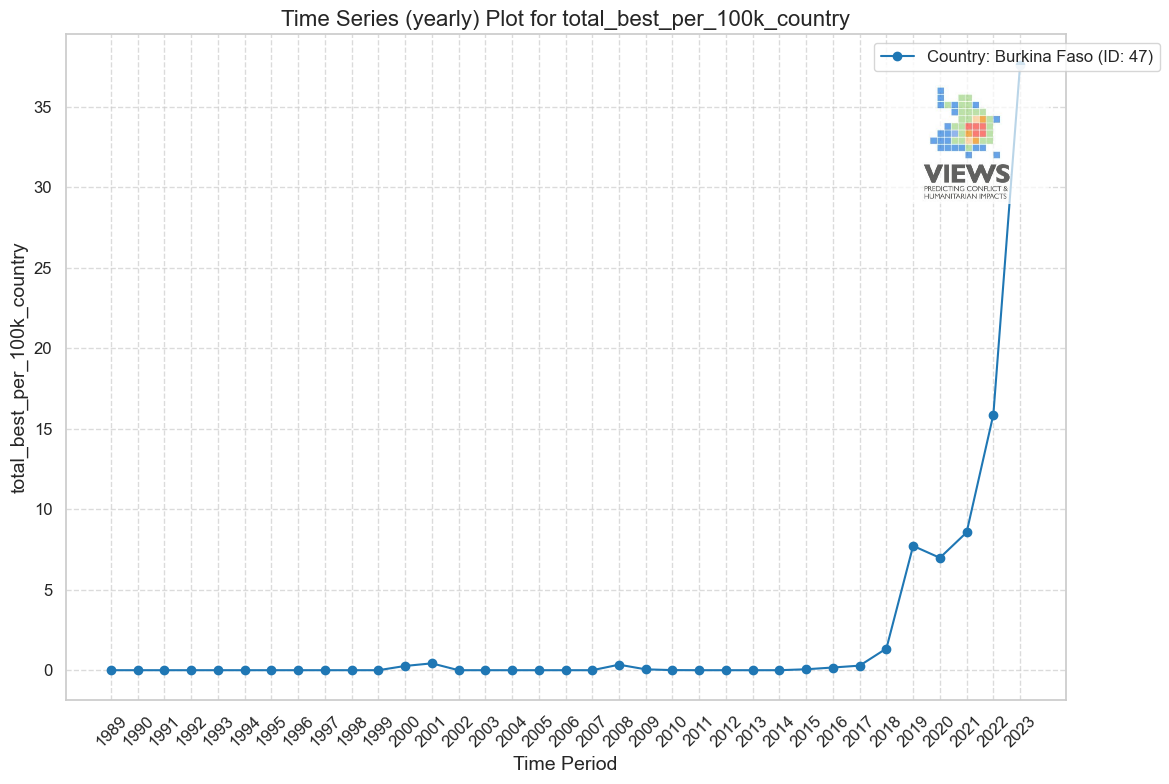

In [7]:
# creating plots of total best per 100k for each country

country_ids = [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158]
# tanzania is also 236, yemen 240

plot_country_time_series(df_yearly, [47], "total_best_per_100k_country", figsize=(12, 8), logo_placement = (0.9, 0.85), legend_placement=(0.8, 1))

Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None


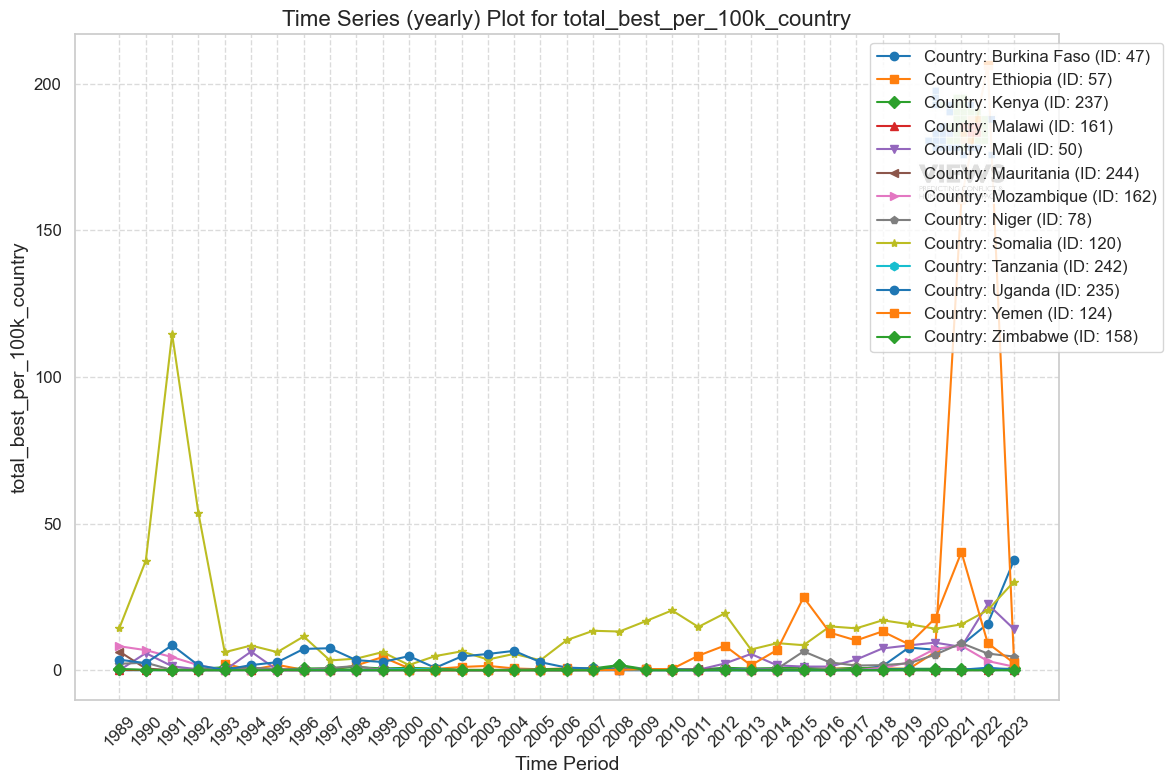

In [8]:
plot_country_time_series(df_yearly, [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158], "total_best_per_100k_country", figsize=(12, 8), logo_placement = (0.9, 0.85), legend_placement=(0.8, 1))

In [18]:
# subsetting the data to only include years up to 2020
df_yearly_2020 = df_yearly[df_yearly["year_id"] <= 2020]

Number of country IDs: 13
Number of titles: 13
Number of colors: 13
Passing title: Burkina Faso Annual Conflict History for country_id: 47
Setting title: Burkina Faso Annual Conflict History


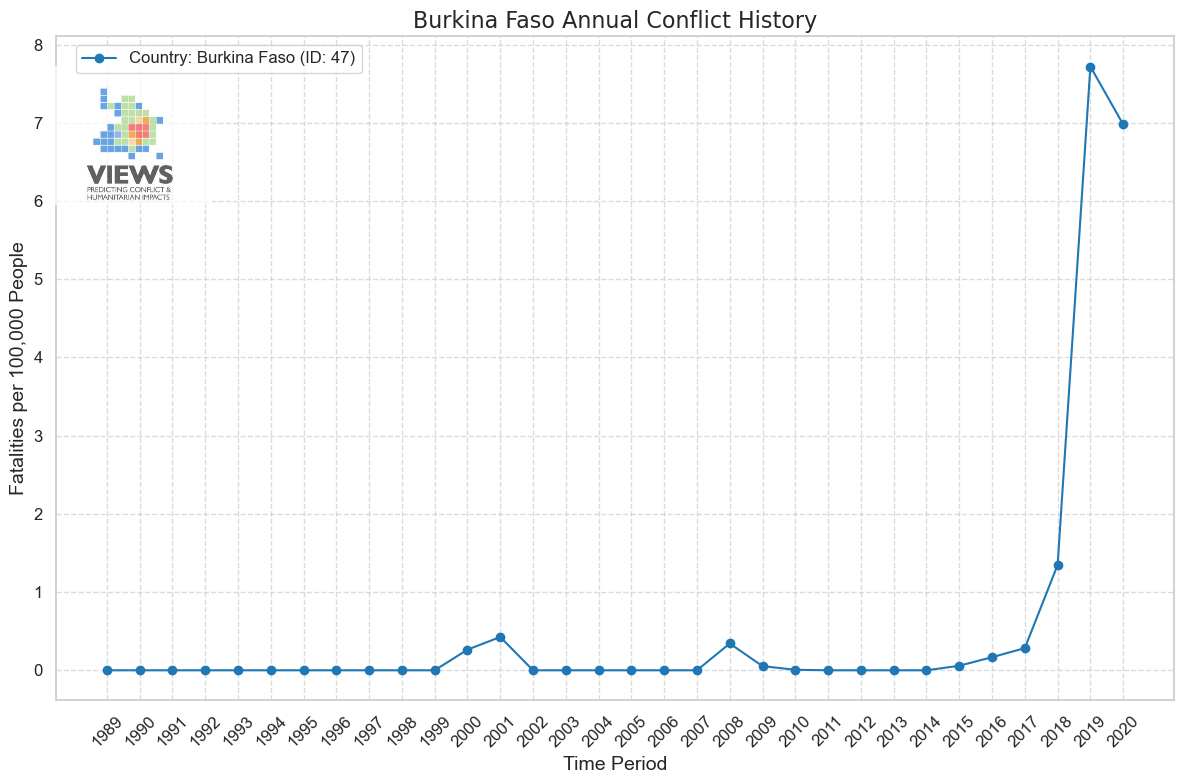

Passing title: Ethiopia Annual Conflict History for country_id: 57
Setting title: Ethiopia Annual Conflict History


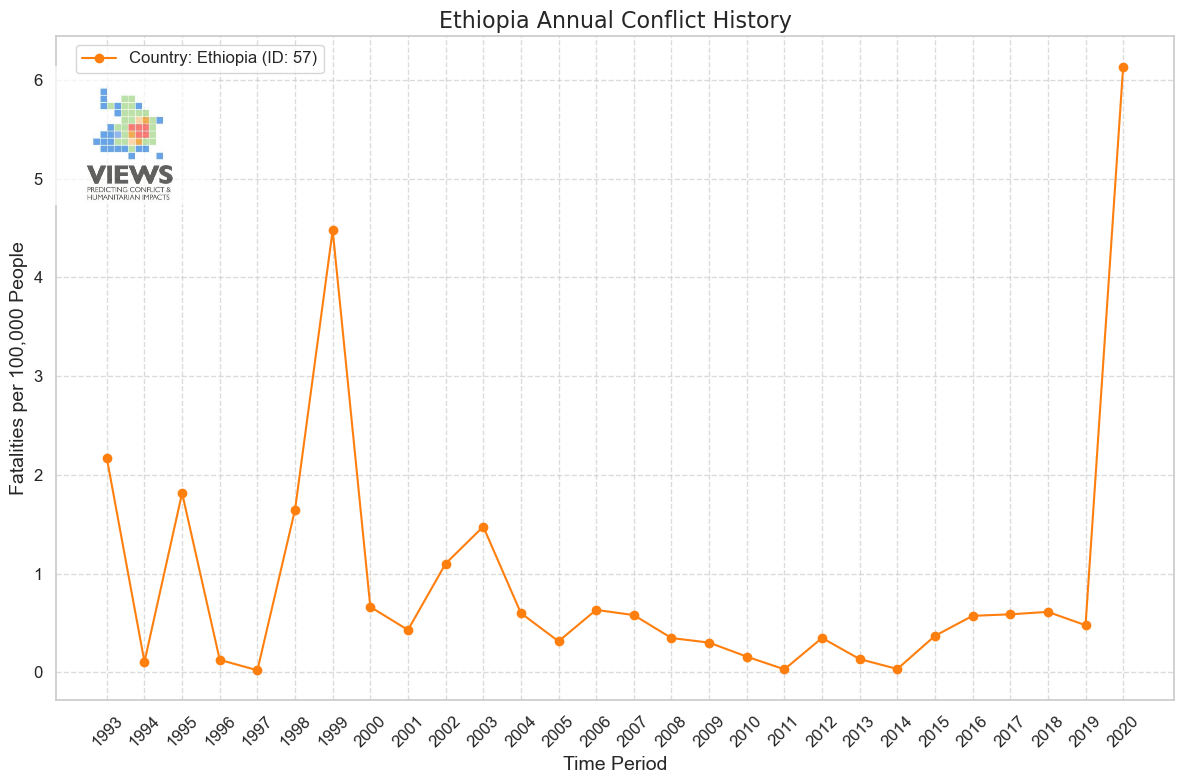

Passing title: Kenya Annual Conflict History for country_id: 237
Setting title: Kenya Annual Conflict History


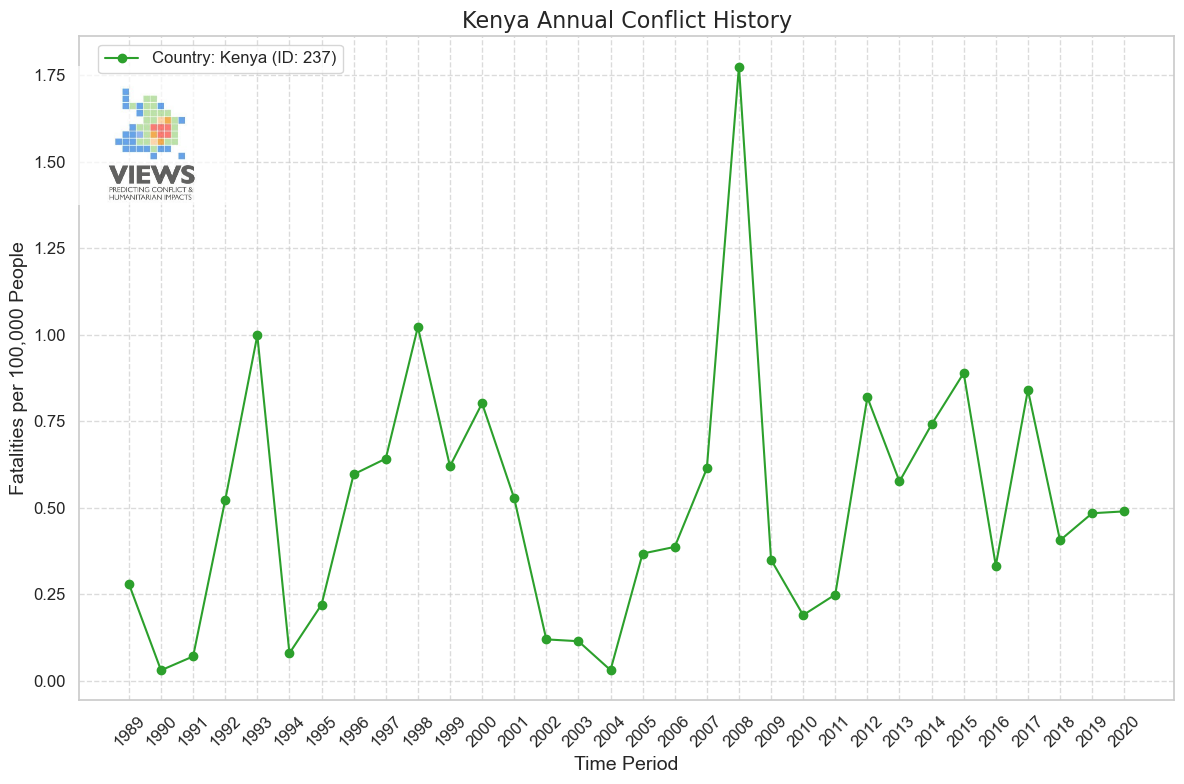

Passing title: Malawi Annual Conflict History for country_id: 161
Setting title: Malawi Annual Conflict History


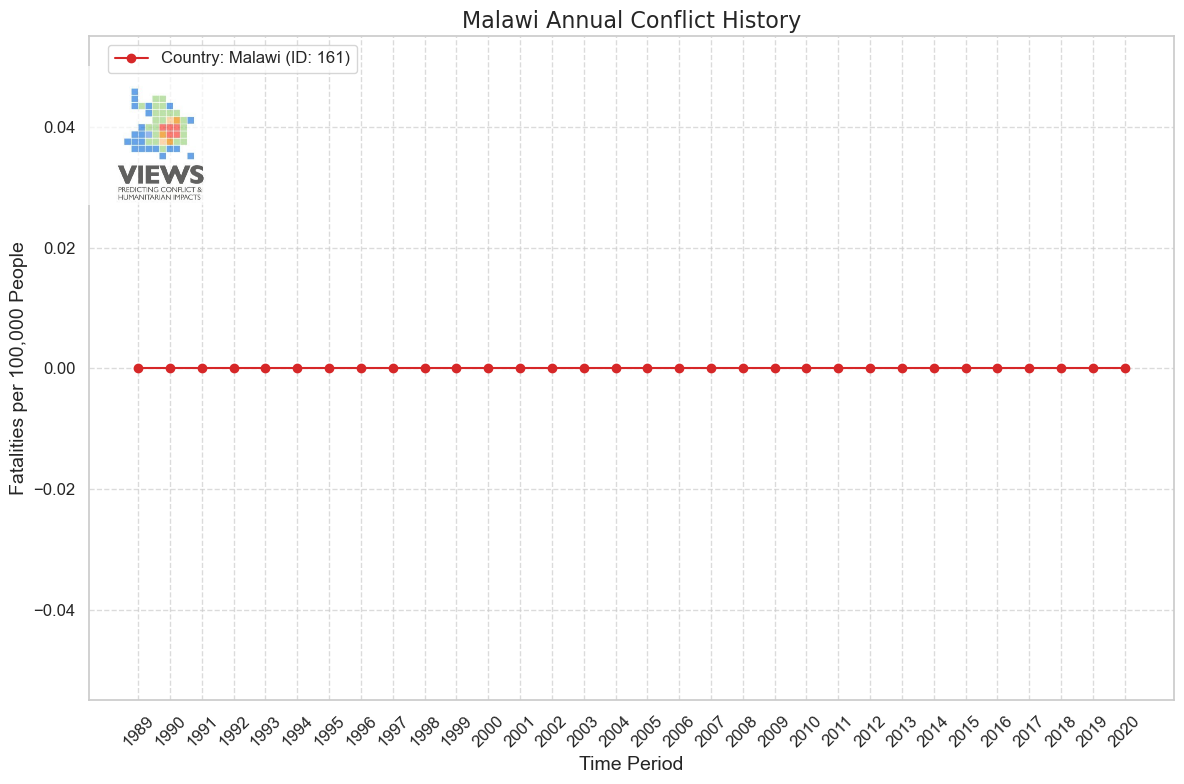

Passing title: Mali Annual Conflict History for country_id: 50
Setting title: Mali Annual Conflict History


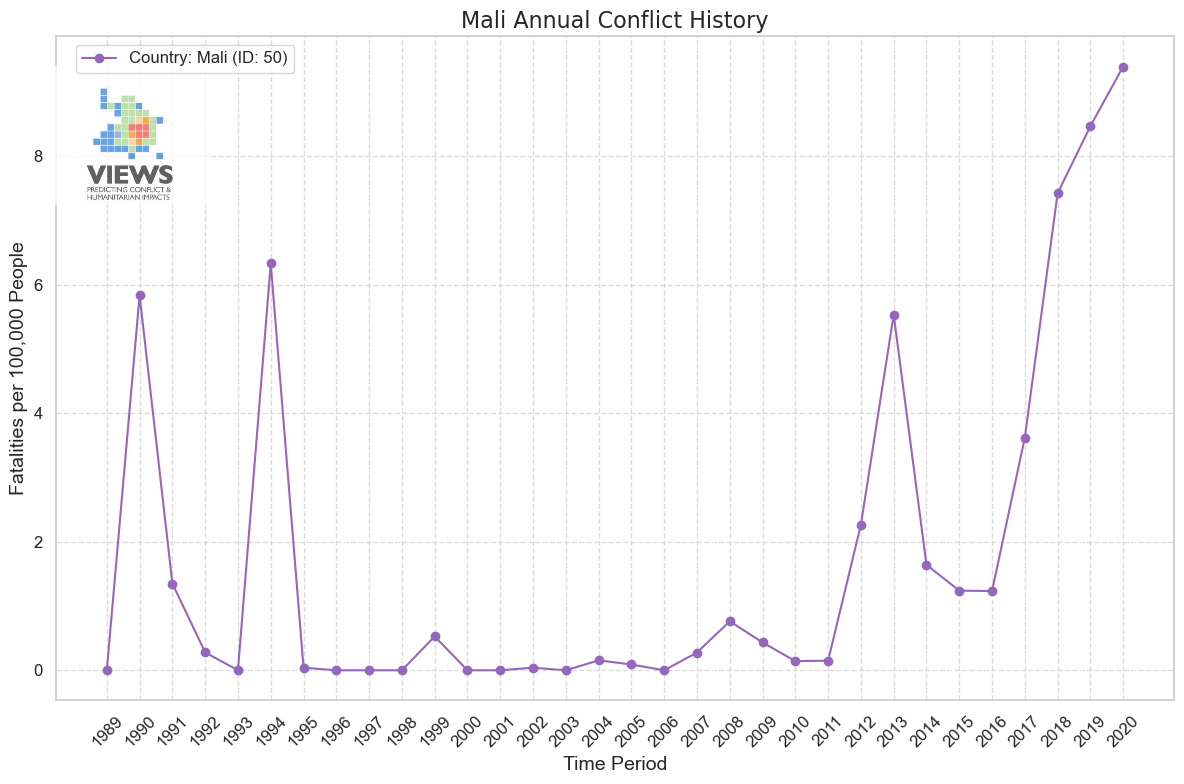

Passing title: Mauritania Annual Conflict History for country_id: 244
Setting title: Mauritania Annual Conflict History


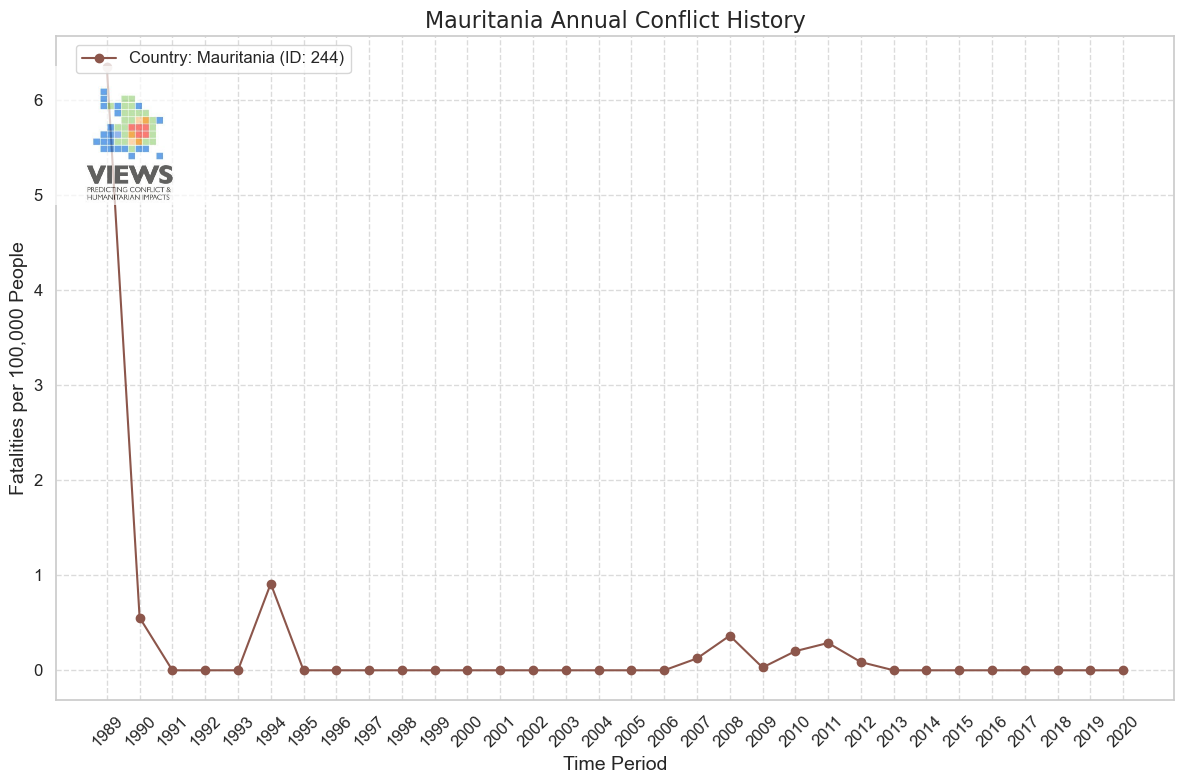

Passing title: Mozambique Annual Conflict History for country_id: 162
Setting title: Mozambique Annual Conflict History


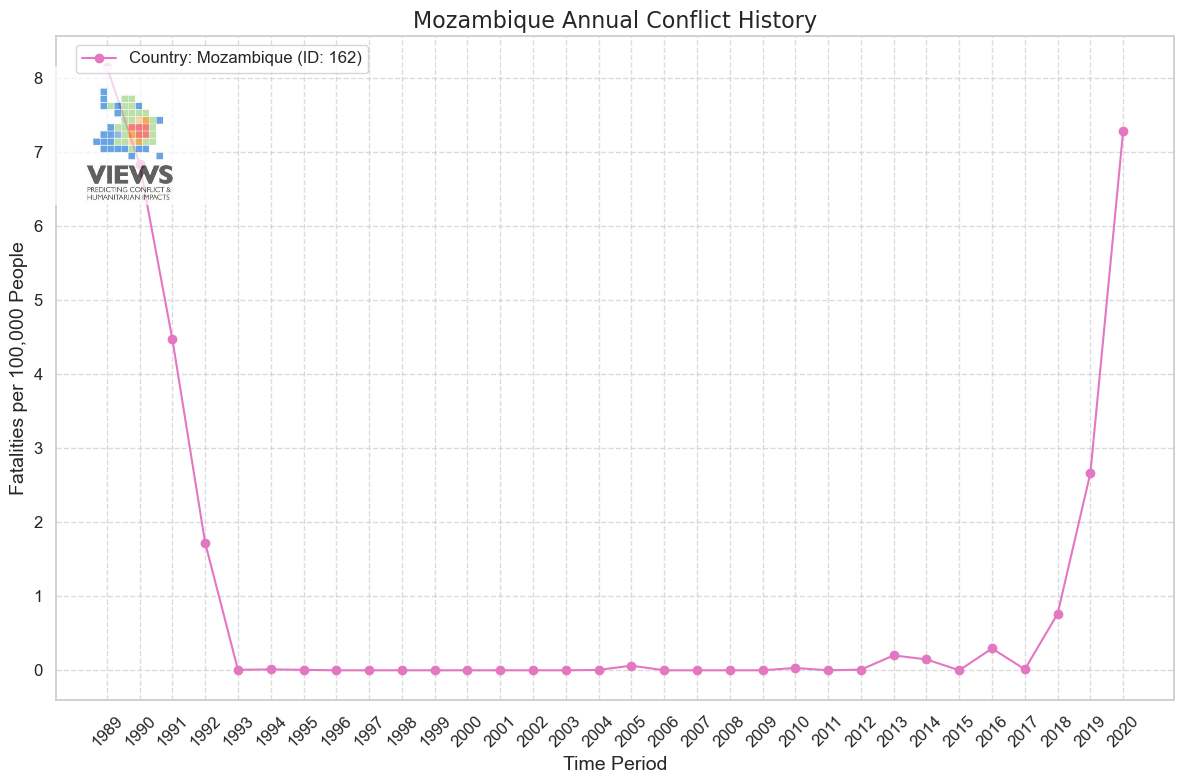

Passing title: Niger Annual Conlfict History for country_id: 78
Setting title: Niger Annual Conlfict History


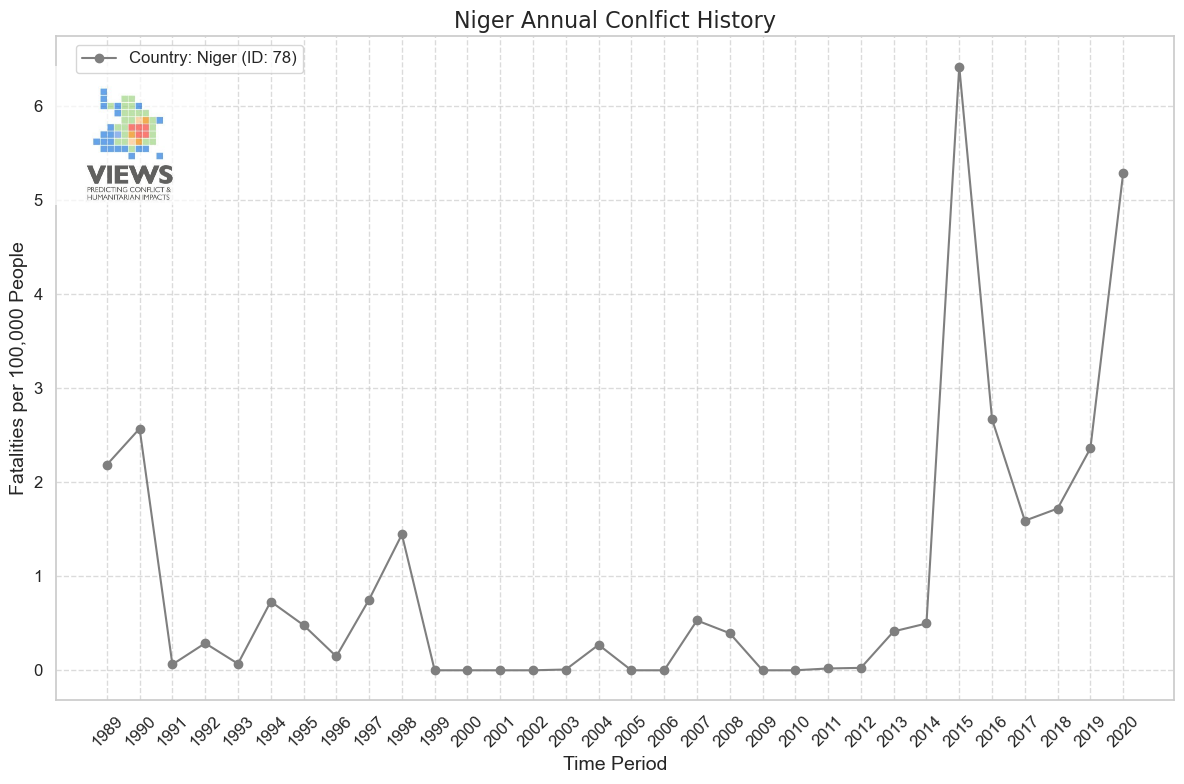

Passing title: Somalia Annual Conflict History for country_id: 120
Setting title: Somalia Annual Conflict History


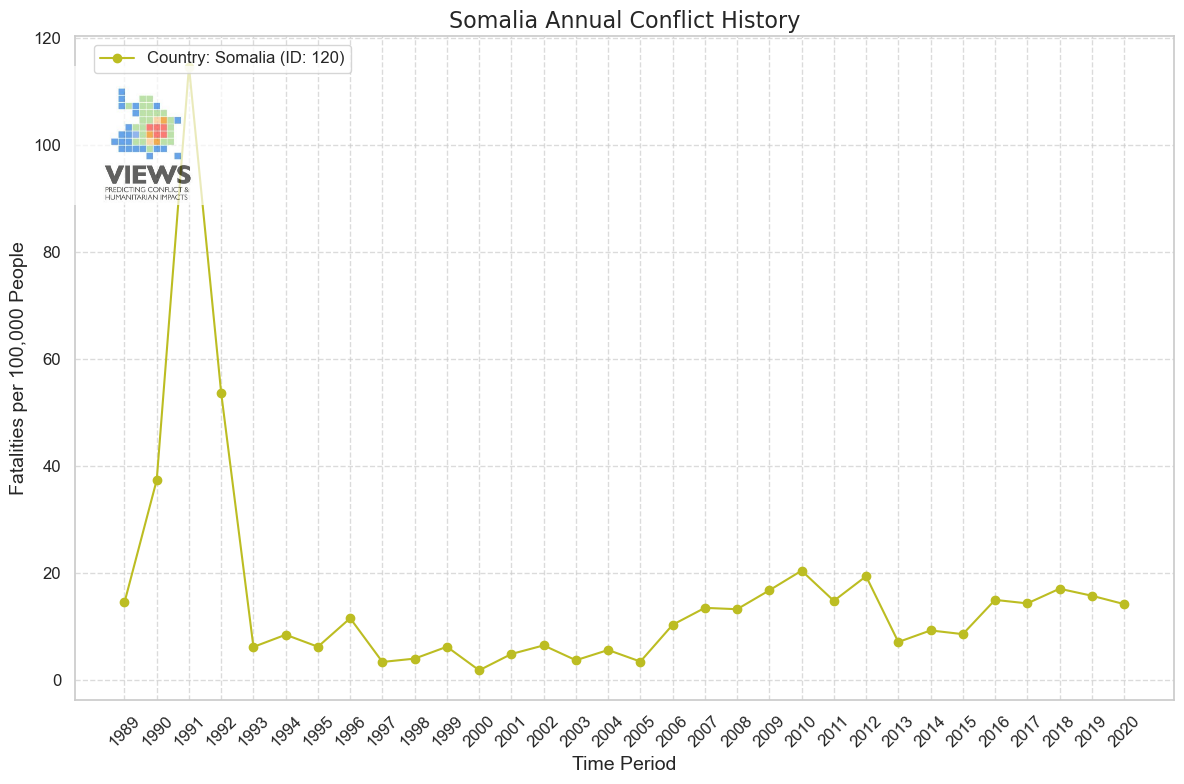

Passing title: Tanzania Annual Conflict History for country_id: 242
Setting title: Tanzania Annual Conflict History


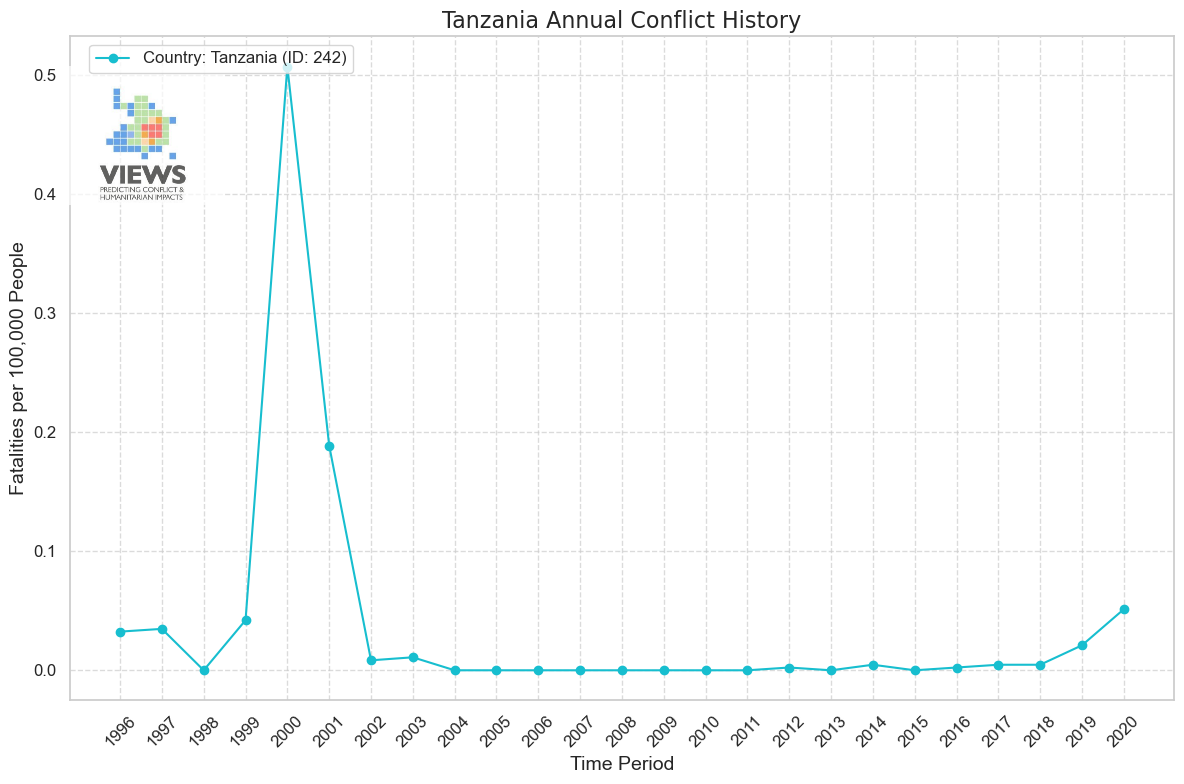

Passing title: Uganda Annual Conflict History for country_id: 235
Setting title: Uganda Annual Conflict History


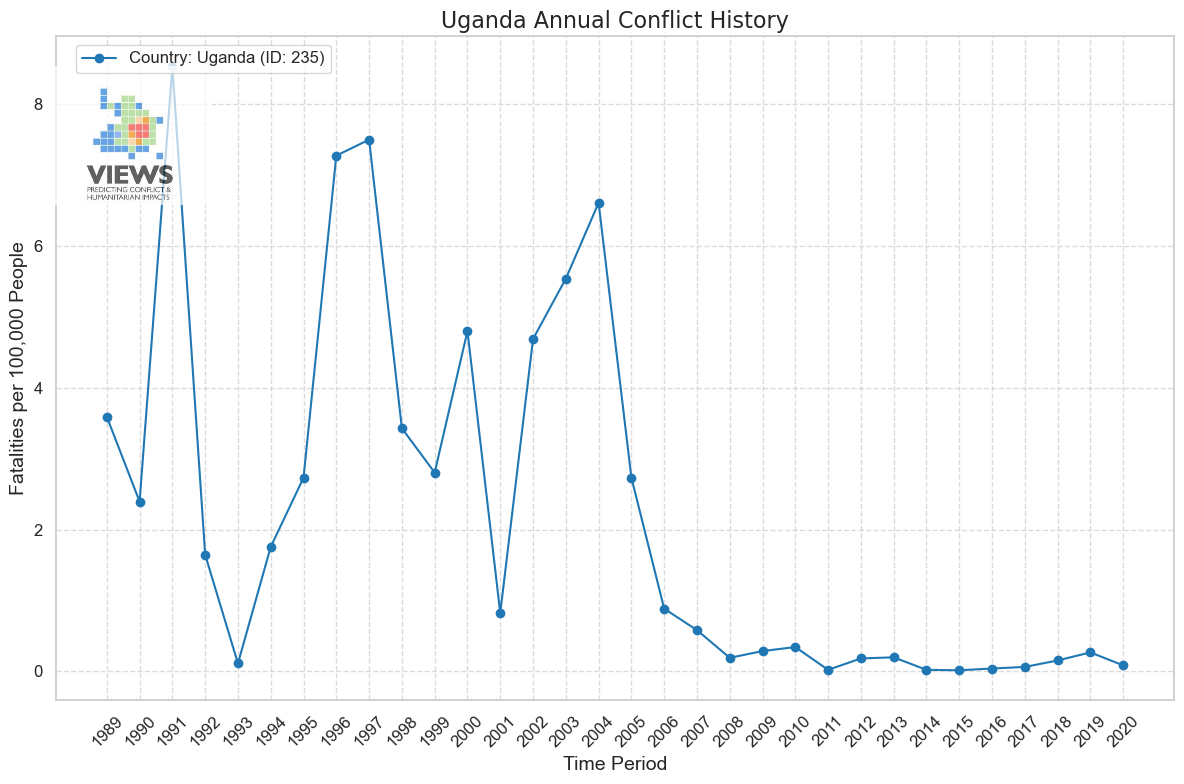

Passing title: Yemen Annual Conflict History for country_id: 124
Setting title: Yemen Annual Conflict History


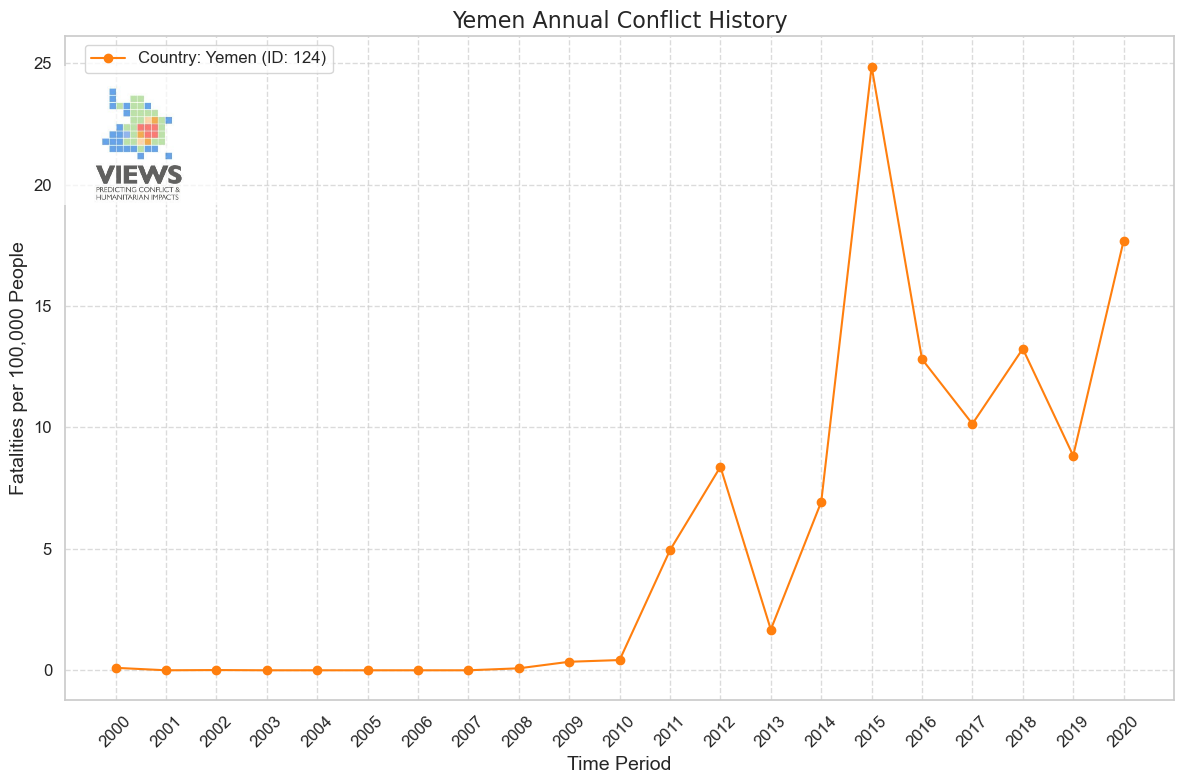

Passing title: Zimbabwe Annual Conflict History for country_id: 158
Setting title: Zimbabwe Annual Conflict History


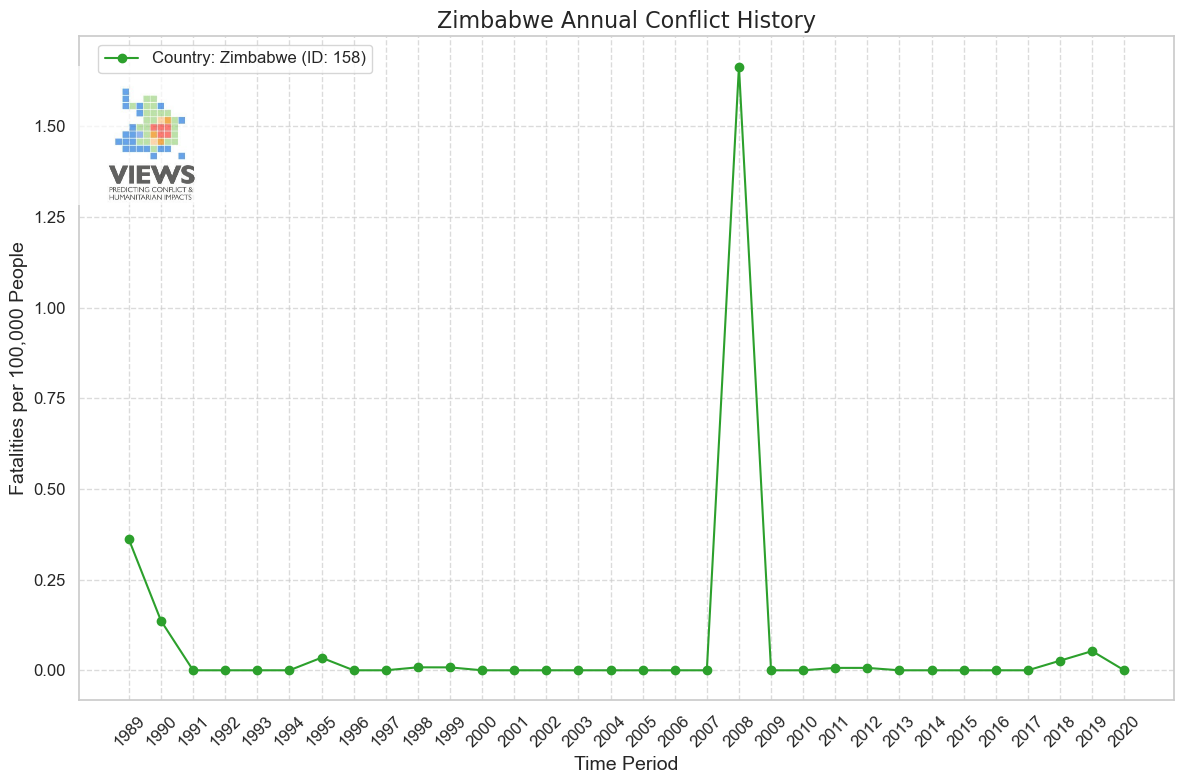

In [20]:
country_ids = [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158]

base_save_path = "/Users/alexatimlick/Documents/FAO" # need to make dynamic function to save plots

# Define a list of colors
colors = sns.color_palette("tab10", len(country_ids))

# Defining a list of titles
titles = ["Burkina Faso Annual Conflict History", "Ethiopia Annual Conflict History",
            "Kenya Annual Conflict History", "Malawi Annual Conflict History",
            "Mali Annual Conflict History", "Mauritania Annual Conflict History",
            "Mozambique Annual Conflict History", "Niger Annual Conlfict History",
            "Somalia Annual Conflict History", "Tanzania Annual Conflict History",
            "Uganda Annual Conflict History", "Yemen Annual Conflict History",
            "Zimbabwe Annual Conflict History"]

# Debugging statements to check the lengths of the lists
print(f"Number of country IDs: {len(country_ids)}")
print(f"Number of titles: {len(titles)}")
print(f"Number of colors: {len(colors)}")

# Ensure the lengths of country_ids and titles match
if len(country_ids) != len(titles):
    raise ValueError("The lengths of country_ids and titles do not match.")

# Loop through country_ids and plot each with a different color
for idx, country_id in enumerate(country_ids):
    print(f"Passing title: {titles[idx]} for country_id: {country_id}")
    # creating a unique path for each plot
    save_path = os.path.join(base_save_path, f"{titles[idx].replace(' ', '_').replace('/', '_')}.png")
    plot_country_time_series(df_yearly_2020, [country_id], "total_best_per_100k_country", 
                             figsize=(12, 8), logo_placement=(0.065, 0.85), 
                             legend_placement=(0.01, 1), force_color=colors[idx],
                             custom_title = titles[idx],
                             custom_ylabel = "Fatalities per 100,000 People",
                             save_plot = True, 
                             PATH_PLOT = save_path
                             )


# utils plotting alexa_alt to include idx for titles, custom ylabels
# need to fix auto naming of plots when saving (currently .png.png)